# Cleaning Lockdown Data
In this notebook we will clean the data collected through the   Coronavirus Government Response Tracker API, maintained by Oxford University. We will drop all the unnecesary info like the missing columns MLT, SVN and HVN. the result will be exported as csv file.



In [1]:
# First import necessary libraries
import requests
import json
import os

import pandas as pd

In [2]:
pd.read_csv(os.path.join("..", '01.raw_data',"stringency.csv"))

,Unnamed: 0,country,date,stringency
0,0,NLD,2020-01-01,0.00
1,1,ROU,2020-01-01,0.00
2,2,SWE,2020-01-01,0.00
3,3,AUT,2020-01-01,0.00
4,4,BEL,2020-01-01,0.00
...,...,...,...,...
6426,6426,IRL,2020-08-26,70.83
6427,6427,ITA,2020-08-26,50.93
6428,6428,LTU,2020-08-26,19.44
6429,6429,LVA,2020-08-26,43.52


In [3]:
df=pd.DataFrame(pd.read_csv(os.path.join("..", '01.raw_data',"stringency.csv")))

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'date', 'stringency'], dtype='object')

We can clearly drop the column 'Unnamed: 0'

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)

Now we sort by country and date to get the information in our desired format

In [6]:
df.sort_values(by=['country','date']).iloc[0:10]

,country,date,stringency
3,AUT,2020-01-01,0.0
37,AUT,2020-01-02,0.0
57,AUT,2020-01-03,0.0
91,AUT,2020-01-04,0.0
111,AUT,2020-01-05,0.0
145,AUT,2020-01-06,0.0
165,AUT,2020-01-07,0.0
199,AUT,2020-01-08,0.0
219,AUT,2020-01-09,0.0
253,AUT,2020-01-10,0.0


We make sure that our date column has the indicated format

In [7]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

We now create a pivot table that will help us to organize the data, to be compatible with the data collected from Spotify

In [8]:
table=pd.pivot_table(data=df, index='date', 
                 values='stringency', columns='country',aggfunc='mean').reset_index().round(1)

In [9]:
table

country,date,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-08-22,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
235,2020-08-23,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
236,2020-08-24,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0
237,2020-08-25,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,43.5,37.0


In [10]:
table.columns

Index(['date', 'AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST',
       'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX',
       'LVA', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE'],
      dtype='object', name='country')

Dropping the unnecesary columns

In [11]:
table=table.drop(columns=[ 'SVN', 'HRV'])

We compute the average per week in a new column.

In [12]:
table['mean'] = table.mean(axis=1).round(1)

In [13]:
table

country,date,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-08-22,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.3
235,2020-08-23,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.3
236,2020-08-24,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.4
237,2020-08-25,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,19.4,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.4


We add a new column that we will us to group our data by weeks, to be compatible with the rest of the collected data

In [14]:
table['week']=table['date'].dt.strftime('%W')

In [15]:
table

country,date,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean,week
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2020-08-22,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.3,33
235,2020-08-23,31.5,56.5,30.6,50.0,36.1,56.9,56.5,62.5,19.4,...,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.3,33
236,2020-08-24,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.4,34
237,2020-08-25,31.5,56.5,30.6,50.0,36.1,59.7,56.5,62.5,19.4,...,30.6,43.5,45.4,39.8,66.2,45.4,32.4,37.0,45.4,34


In [16]:
table=table.groupby('week').mean().round(1)


In [17]:
table

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
week,,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.9
04,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.7
05,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.4
06,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.9
07,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.4
08,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.3


Now we are going to rename the column week by picking up a day from the week to represent it.

In [18]:
import datetime

base = datetime.datetime(2020, 8, 21)
date_list = [(base - datetime.timedelta(days=x)*7).strftime("%Y-%m-%d") for x in range(-1, 34)]
#date_2=date_list.reverse()
print(date_list[::-1])

['2020-01-03', '2020-01-10', '2020-01-17', '2020-01-24', '2020-01-31', '2020-02-07', '2020-02-14', '2020-02-21', '2020-02-28', '2020-03-06', '2020-03-13', '2020-03-20', '2020-03-27', '2020-04-03', '2020-04-10', '2020-04-17', '2020-04-24', '2020-05-01', '2020-05-08', '2020-05-15', '2020-05-22', '2020-05-29', '2020-06-05', '2020-06-12', '2020-06-19', '2020-06-26', '2020-07-03', '2020-07-10', '2020-07-17', '2020-07-24', '2020-07-31', '2020-08-07', '2020-08-14', '2020-08-21', '2020-08-28']


In [19]:
# Create a list of dates
weeks_date=[]

for i in range(len(date_list)-1):
    x=f"{date_list[i+1]}--{date_list[i]}"
    weeks_date.append(x)


In [20]:
table['week']=date_list[::-1]

In [21]:
table

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean,week
week,,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-10
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-17
03,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.9,2020-01-24
04,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.7,2020-01-31
05,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.4,2020-02-07
06,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.9,2020-02-14
07,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.4,2020-02-21
08,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.3,2020-02-28


In [22]:
table=table.set_index('week')

In [46]:
table.round(2)

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
week,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.9
2020-01-31,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.7
2020-02-07,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.4
2020-02-14,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.9
2020-02-21,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.4
2020-02-28,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.3


Now we plot to see if our data has some kind of correlation and we didn't made mistakes either during the importing or manipulation 

<Figure size 432x288 with 0 Axes>

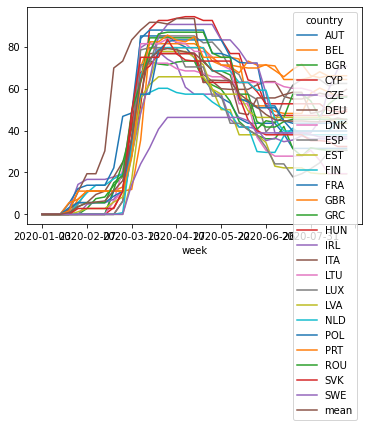

In [24]:
import matplotlib.pyplot as plt
f= plt.figure()


table.plot()

In [25]:
table.to_csv('lockdown_clean.csv')

In [30]:
import dataframe_image as dfi

In [50]:
table_plot=table.round(2).style.background_gradient()

In [52]:
table_styled

In [38]:
dfi.export(table_styled,'table_styled.jpg')

In [39]:
pd.options.display.latex.repr=True

In [42]:
table

country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE,mean
week,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,2.4,2.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,1.6,0.0,0.0,0.0,0.9
2020-01-31,0.0,7.2,0.0,0.0,14.3,5.6,0.0,4.8,0.0,5.6,...,0.0,0.0,1.2,0.0,5.6,11.1,3.6,2.8,0.0,3.7
2020-02-07,0.0,11.1,2.8,0.0,16.7,5.6,0.0,11.1,0.0,10.3,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.4
2020-02-14,0.0,11.1,7.5,0.0,16.7,9.5,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,5.9
2020-02-21,0.0,11.1,8.3,0.0,16.7,11.1,0.0,11.1,0.0,13.9,...,0.0,0.0,2.8,0.0,5.6,11.1,5.6,2.8,0.0,6.4
2020-02-28,11.1,11.1,13.9,0.0,17.9,17.9,6.3,11.1,0.0,17.0,...,6.4,0.0,5.9,0.0,8.7,11.1,15.1,2.8,0.0,11.3
